1

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

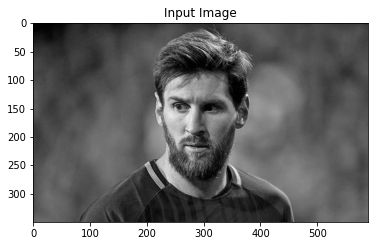

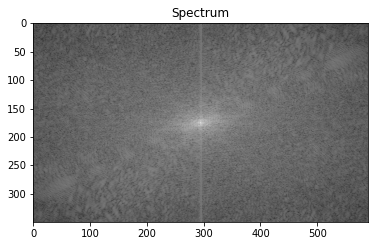

In [ ]:
# import the picture, and turn it to grayscale
img = cv2.imread('messi.jpg', 0)
plt.title('Input Image')
plt.imshow(img, cmap = 'gray')
plt.show()

# change the image to float32, because the fft receive float32
img_float32 = np.float32(img)

# because the image is 2d we use fft2 and then we use fftshift to move 0 frequency to the middle
fft = np.fft.fft2(img_float32)
fft_shift = np.fft.fftshift(fft)

plt.title('Spectrum')
plt.imshow(np.log(1+np.abs(fft_shift)),cmap= 'gray')
plt.show() 

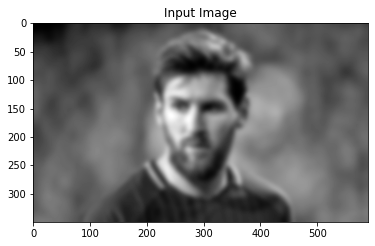

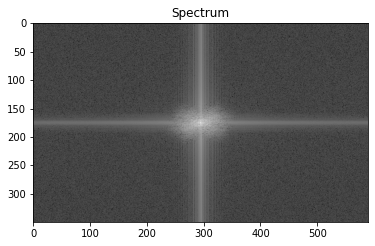

In [ ]:
# import the picture, and turn it to grayscale with blur effect
img_blur = cv2.GaussianBlur(img,(25,25),cv2.BORDER_DEFAULT) 
plt.title('Input Image')
plt.imshow(img_blur, cmap = 'gray')
plt.show()

# change the image to float32, because the fft receive float32
img_float32 = np.float32(img_blur)

# because the image is 2d we use fft2 and then we use fftshift to move 0 frequency to the middle
fft = np.fft.fft2(img_float32)
fft_shift = np.fft.fftshift(fft)

plt.title('Spectrum')
plt.imshow(np.log(1+np.abs(fft_shift)),cmap= 'gray')
plt.show() 

2

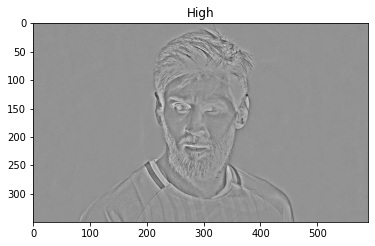

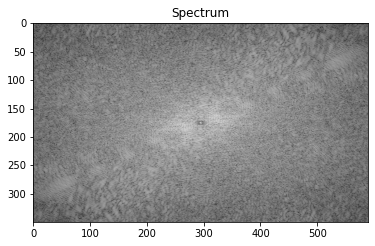

In [ ]:
high = ((img_blur/2) - img/2)
plt.title('High')
plt.imshow(high, cmap = 'gray')
plt.show()

# change the image to float32, because the fft receive float32
img_float32 = np.float32(high)

# because the image is 2d we use fft2 and then we use fftshift to move 0 frequency to the middle
fft = np.fft.fft2(img_float32)
fft_shift = np.fft.fftshift(fft)

plt.title('Spectrum')
plt.imshow(np.log(1+np.abs(fft_shift)),cmap= 'gray')
plt.show() 

3

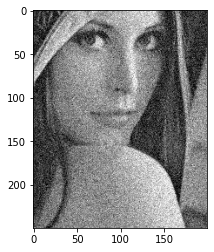

In [ ]:
import math
noisy_img = cv2.imread('lena.jpg', 0)

plt.imshow(noisy_img, cmap='gray')
plt.show()

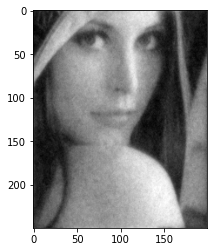

In [ ]:
def distance(a,b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def butterworthHP(d, shape, n):
    base = np.zeros(shape[:2])
    rows, cols = shape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/d**2*n))
    return base

res = np.fft.fft2(noisy_img)
shifted_res = np.fft.fftshift(res)

butterworth_center = shifted_res * butterworthHP(10, noisy_img.shape, 1)
butterworth_res = np.fft.ifftshift(butterworth_center)
inv_butterworth = np.fft.ifft2(butterworth_res)
plt.imshow(1+np.abs(inv_butterworth), cmap='gray')
plt.show()